# Kmeans

___

## Table of Contents
- [Importing libraries](#Importing-libraries)
- [Load data](#Load-data)
- [Machine Learning](#Machine-Learning)

___

## Importing libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist

___

## Load data

In [12]:
from sklearn.datasets import make_regression

In [13]:
X, y = make_regression(n_samples=30, n_features=1, noise=1, random_state=42)

___

## Machine Learning 

### Kmeans

In [14]:
class KMeans:
    def fit (self, X, k, n_iter=200):
        centers = random.sample(list(X), k)
        for _ in range(n_iter):
            clusters = np.argmin(cdist(X, centers), axis=1)
            centers = np.array([X[clusters==c].mean(0) for c in clusters])
        return clusters

In [15]:
model = KMeans()

In [16]:
z = model.fit(X, 2)

In [17]:
X_data = np.array(X)
y_data = np.array(y)
new_data = np.append(X_data, y_data.reshape(-1,1), axis=1)
df = pd.DataFrame(new_data, columns=['feat1', 'label'])
df['cluster'] = z

In [18]:
df.head()

,feat1,label,cluster
0,-1.150994,-80.262935,0
1,-0.562288,-39.011711,0
2,-0.138264,-9.622256,2
3,-0.234137,-15.631075,2
4,1.523030,104.205205,2


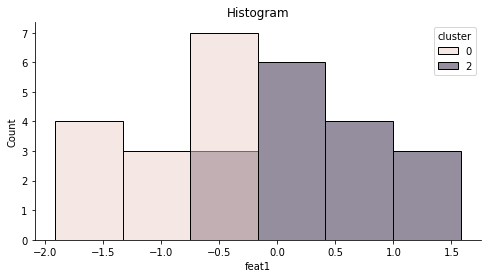

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(x ='feat1', data = df, hue='cluster')
sns.despine()
plt.title('Histogram')
plt.show()